In [1]:
from matplotlib import rcParams

In [2]:
%matplotlib inline
from preprocess import KNeighborsImputer, rename_columns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
field_codes = {1: "Law", 2: "Math", 3: "Social Science, Psychologist", 4: "Medical Science, Pharmaceuticals, and Bio Tech", 5: "Engineering", 6: "English/Creative Writing/ Journalism", 7: "History/Religion/Philosophy", 8: "Business/Econ/Finance ", 9: "Education, Academia", 10: "Biological Sciences/Chemistry/Physics", 11: "Social Work", 12: "Undergrad/undecided ", 13:"Political Science/International Affairs", 14:"Film", 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"}

In [4]:
frame=rename_columns(pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1"))
frame['mn_sat'] = frame.mn_sat.str.replace(r',','').astype(float)
frame['tuition'] = frame.tuition.str.replace(r',','').astype(float)
frame['income'] = frame.income.str.replace(',','').astype(float)
frame['zipcode'] = frame.zipcode.str.replace(',','').astype(float)
frame['field_cd'] = frame.field_cd.map(field_codes)

findex=frame.gender==0
mindex=frame.gender==1

In [5]:
_id = pd.Index(['iid','pid'])
personal_attributes = pd.Index(['gender','age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'initial_race_importance', 'initial_religion_importance', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
pre_survey = pd.Index(['initial_happy_expectation', 'initial_number_expectation', 'initial_attractive_importance', 'initial_sincere_importance', 'initial_intelligence_importance', 'initial_fun_importance', 'initial_ambitious_importance', 'initial_shared_interests_importance', 'initial_attractive_same_importance', 'initial_sincere_same_importance', 'initial_intelligence_same_importance', 'initial_fun_same_importance', 'initial_ambitious_same_importance', 'initial_shared_same_importance', 'initial_attractive_opposite_importance', 'initial_sincere_opposite_importance', 'initial_intelligence_opposite_importance', 'initial_fun_opposite_importance', 'initial_ambitious_opposite_importance', 'initial_shared_opposite_importance', 'initial_attractive_self_measure', 'initial_sincere_self_measure', 'initial_fun_self_measure', 'initial_intelligence_self_measure', 'initial_ambitious_self_measure', 'initial_attractive_others_measure', 'initial_sincere_others_measure', 'initial_intelligence_others_measure', 'initial_fun_others_measure', 'initial_ambitious_others_measure'])
decisions = pd.Index(['dec','match'])
partner_attributes = pd.Index(['pid','partner','int_corr', 'samerace','age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o'])
wave_conditions = pd.Index(['condtn', 'wave', 'round', 'position','positin1', 'order'])
during_survey = pd.Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met'])
halfway_survey = pd.Index(['match_es', 'halfway_attractive_importance','halfway_sincere_importance', 'halfway_intelligence_importance','halfway_fun_importance', 'halfway_ambitious_importance','halfway_shared_interests_importance','halfway_attractive_self_measure', 'halfway_sincere_self_measure','halfway_intelligence_self_measure', 'halfway_fun_self_measure','halfway_ambitious_self_measure'])
followup_survey = pd.Index(['followup_overall_satisfaction','followup_length_dates_satisfaction','followup_num_dates_satisfaction','followup_attractive_influence','followup_sincere_influence','followup_intelligence_influence','followup_fun_influence','followup_ambitious_influence','followup_shared_interests_influence','followup_attractive_importance','followup_sincere_importance','followup_intelligence_importance','followup_fun_importance','followup_ambitious_importance','followup_shared_interests_importance','followup_attractive_same_importance','followup_sincere_same_importance','followup_intelligence_same_importance','followup_fun_same_importance','followup_ambitious_same_importance','followup_shared_same_importance','followup_attractive_opposite_importance','followup_sincere_opposite_importance','followup_intelligence_opposite_importance','followup_fun_opposite_importance','followup_ambitious_opposite_importance','followup_shared_opposite_importance','followup_attractive_self_measure','followup_sincere_self_measure','followup_intelligence_self_measure','followup_fun_self_measure','followup_ambitious_self_measure','followup_attractive_others_measure','followup_sincere_others_measure','followup_intelligence_others_measure','followup_fun_others_measure','followup_ambitious_others_measure',])
final_survey = pd.Index(['final_you_call_count','final_them_call_count','final_match_dates','final_num_match_seen','final_num_match_dates','final_attractive_importance','final_sincere_importance','final_intelligence_importance','final_fun_importance','final_ambitious_importance','final_shared_interests_importance','final_attractive_influence','final_sincere_influence','final_intelligence_influence','final_fun_influence','final_ambitious_influence','final_shared_interests_influence','final_attractive_same_importance','final_sincere_same_importance','final_intelligence_same_importance','final_fun_same_importance','final_ambitious_same_importance','final_shared_same_importance','final_attractive_opposite_importance','final_sincere_opposite_importance','final_intelligence_opposite_importance','final_fun_opposite_importance','final_ambitious_opposite_importance','final_shared_opposite_importance','final_attractive_self_measure','final_sincere_self_measure','final_intelligence_self_measure','final_fun_self_measure','final_ambitious_self_measure','final_attractive_others_measure','final_sincere_others_measure','final_intelligence_others_measure','final_fun_others_measure','final_ambitious_others_measure',])

In [6]:
frame.shape

(8378, 195)

In [7]:
frame.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,final_attractive_self_measure,final_sincere_self_measure,final_intelligence_self_measure,final_fun_self_measure,final_ambitious_self_measure,final_attractive_others_measure,final_sincere_others_measure,final_intelligence_others_measure,final_fun_others_measure,final_ambitious_others_measure
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
fframe = frame.loc[findex].copy()
mframe = frame.loc[mindex].copy()

## Cleaning 

In [9]:
text_columns = frame.dtypes[(frame.dtypes==object) & (~frame.dtypes.index.str.contains('name'))].index
frame[text_columns] = frame[text_columns].apply(lambda x: x.astype('category'))
categorical_columns = frame.dtypes[frame.dtypes=='category'].index
categorical_features = frame[categorical_columns]
for col in categorical_columns:
    categorical_features[col+'_code'] = categorical_features[col].cat.codes
categorical_features.head()

,field,field_cd,undergra,from,career,field_code,field_cd_code,undergra_code,from_code,career_code
0,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
1,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
2,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
3,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
4,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300


In [10]:
unique_date = wave_conditions.drop(['condtn','positin1','round']).tolist()
attributes_columns = (pre_survey | personal_attributes | _id | ['match'] | unique_date)
attributes_frame = frame.loc[:,attributes_columns].copy()

In [11]:
attributes_frame.isnull().sum().sort_values(ascending=False)[:20]

initial_number_expectation              6578
mn_sat                                  5245
tuition                                 4795
income                                  4099
initial_fun_others_measure              3472
initial_attractive_others_measure       3472
initial_sincere_others_measure          3472
initial_ambitious_others_measure        3472
initial_intelligence_others_measure     3472
undergra                                3464
initial_shared_same_importance          1911
initial_attractive_same_importance      1889
initial_fun_same_importance             1889
initial_ambitious_same_importance       1889
initial_intelligence_same_importance    1889
initial_sincere_same_importance         1889
zipcode                                 1064
initial_shared_interests_importance      121
initial_attractive_self_measure          105
initial_fun_self_measure                 105
dtype: int64

In [12]:
attributes_frame.shape,attributes_frame.match.sum()

((8378, 70), 1380)

In [13]:
attributes_frame.dropna(axis=1,thresh=8200,inplace=True)
attributes_frame.dropna(subset=['pid'],inplace=True)

for col in attributes_frame.columns:
    if hasattr(attributes_frame[col],'cat'):
        attributes_frame[col] = attributes_frame[col].cat.codes
attributes_frame = attributes_frame.replace(-1,np.nan)
attributes_frame.dropna(thresh=45,inplace=True)

In [14]:
attributes_frame.shape, attributes_frame.match.sum()

((8289, 53), 1365)

In [15]:
attributes_frame.isnull().sum().sort_values(ascending=False)[:20]

initial_shared_interests_importance      40
age                                      31
initial_sincere_self_measure             26
initial_ambitious_self_measure           26
initial_attractive_self_measure          26
initial_fun_self_measure                 26
initial_intelligence_self_measure        26
initial_happy_expectation                22
field_cd                                 19
initial_ambitious_importance             18
date                                     18
career                                   10
initial_shared_opposite_importance        9
initial_fun_importance                    9
initial_ambitious_opposite_importance     9
gaming                                    0
iid                                       0
hiking                                    0
goal                                      0
go_out                                    0
dtype: int64

In [16]:
#imputer = KNeighborsImputer(n_neighbors=6)
#filled_attributes_frame = imputer.fit_transform(attributes_frame).astype(int)
#filled_attributes_frame.to_pickle('imputed.pkl')
filled_attributes_frame = pd.read_pickle('imputed.pkl')

## Exploring

In [17]:
explore_frame = frame.copy()
explore_frame['gender'] = explore_frame.gender.map({0:'Female',1:'Male'})
females = explore_frame.gender.where(explore_frame.gender=='Female').dropna().index
males = explore_frame.gender.where(explore_frame.gender=='Male').dropna().index

In [86]:
sns.set_context(context='poster', font_scale=1, rc={'figure.dpi':'1200'})
sns.set_style('white')

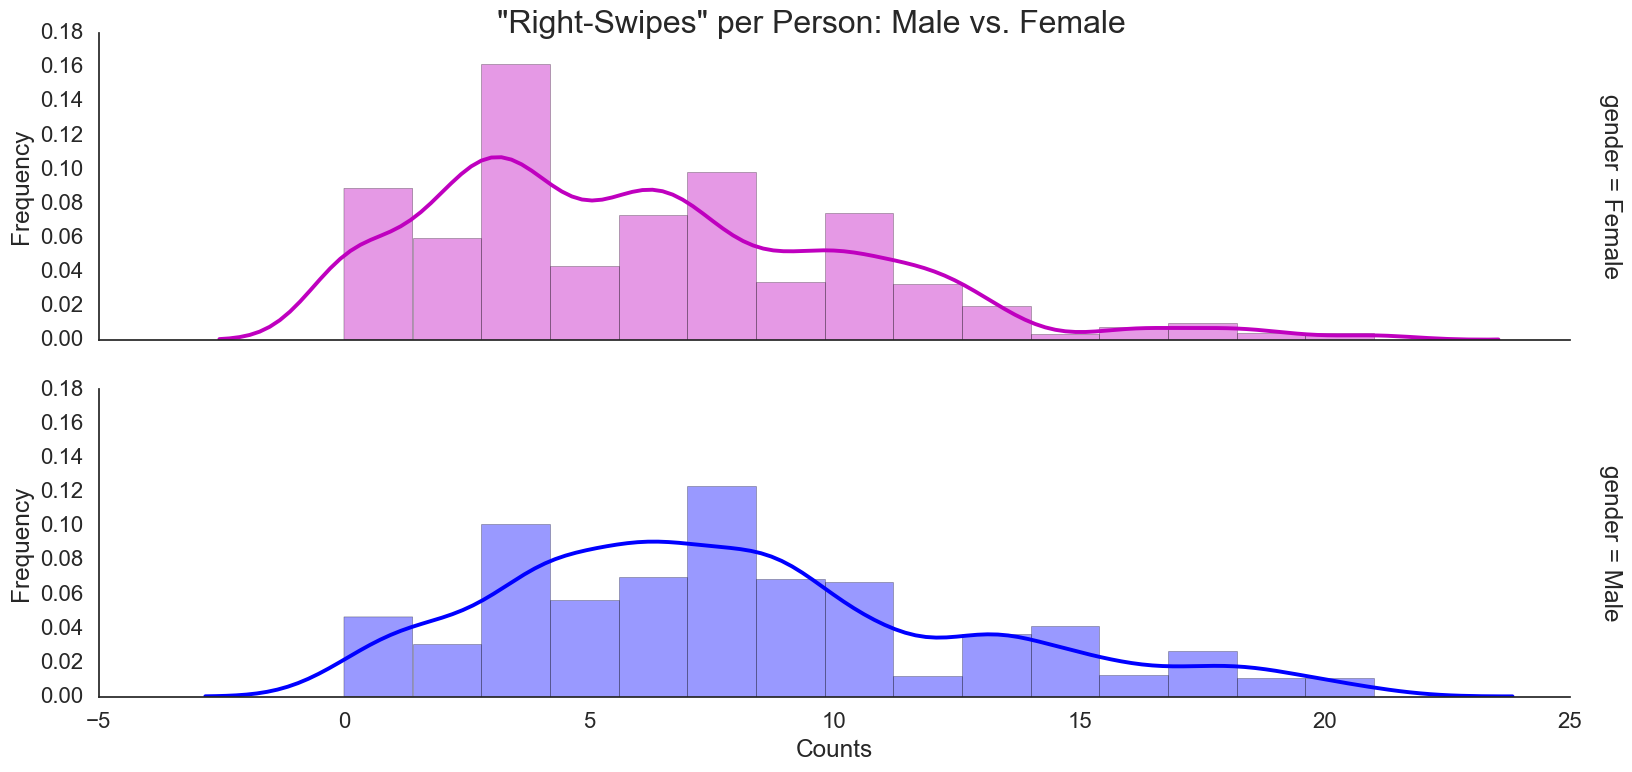

In [19]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['dec_person'] = explore_frame.groupby(['iid'])['dec'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['dec_person'] = explore_frame['round'] - explore_frame['dec_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('"Right-Swipes" per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'dec_person',bins=15,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
#g.savefig('../Assets/decs_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)
plt.show();

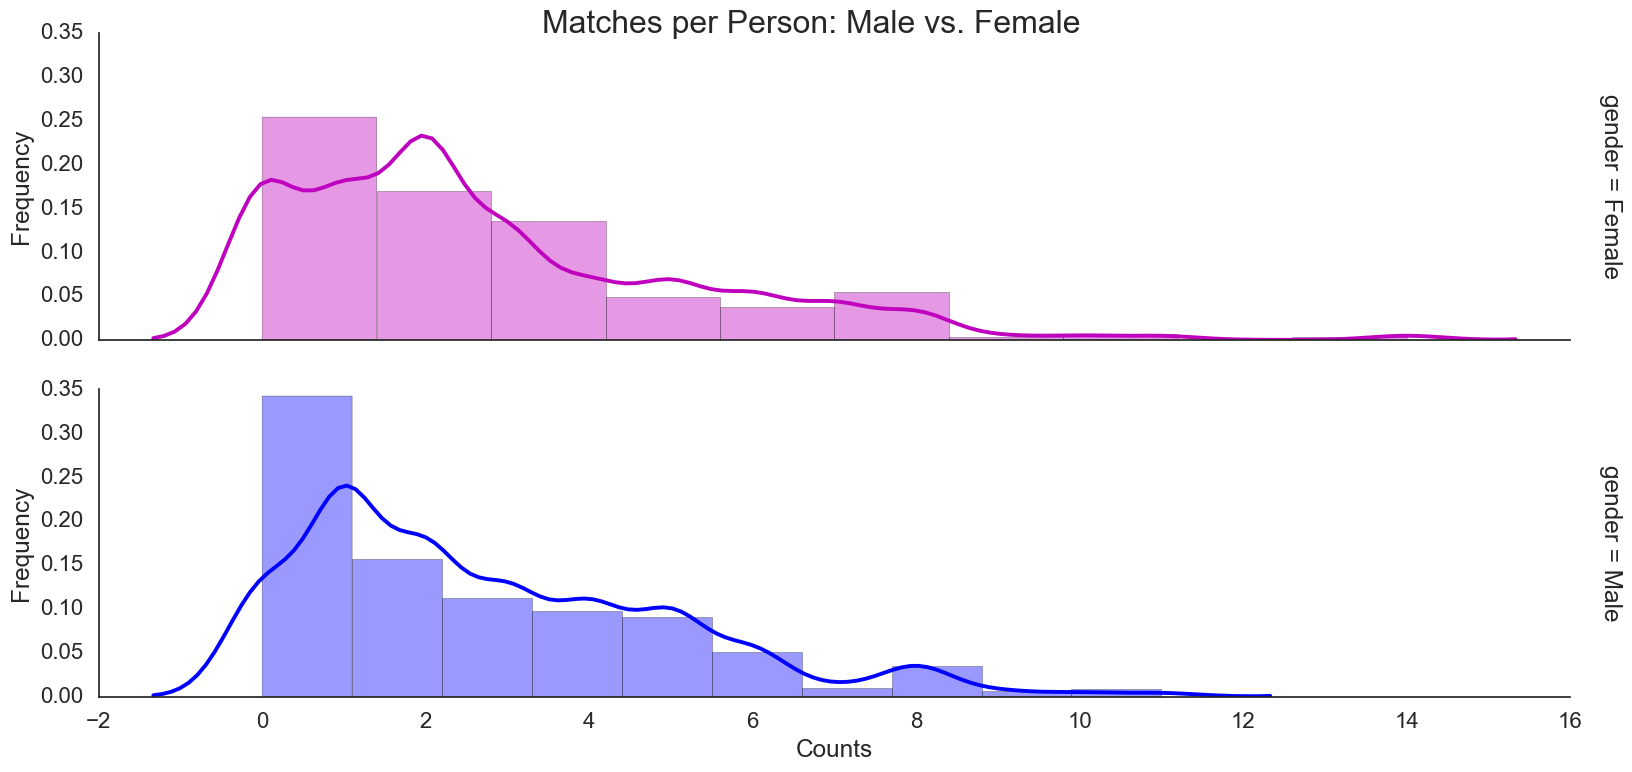

In [20]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['match_person'] = explore_frame.groupby(['iid'])['match'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['match_person'] = explore_frame['round'] - explore_frame['match_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('Matches per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'match_person',bins=10,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
#g.savefig('../Assets/matches_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)

plt.show();

In [21]:
iid_attributes = attributes_frame.groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[['field', 'field_cd', 'from', 'career']] = iid_attributes[['field', 'field_cd', 'from', 'career']].apply(lambda x: x.astype('category'))
iid_attributes['field_cd'] = iid_attributes.field_cd.map(field_codes).astype('category')
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
iid_attributes['gender'] = iid_attributes.gender.map({0:'Female',1:'Male'})
female_attributes = iid_attributes.loc[iid_attributes.gender=="Female"].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender=="Male"].drop('gender',axis=1)
#iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [22]:
field_counts = pd.DataFrame()
field_counts['Females'] = iid_attributes.loc[findex,'field_cd'].value_counts(normalize=True)
field_counts['Males'] = iid_attributes.loc[mindex,'field_cd'].value_counts(normalize=True)
field_counts['diff'] = field_counts.Males - field_counts.Females

field_counts['Gender'] = np.where(field_counts['diff'] > 0,'Male','Female'); field_counts

field_counts.sort_values(by='diff',inplace=True,ascending=False)
field_counts['diff'] = field_counts['diff'].abs()*500
field_counts = field_counts.reset_index().rename(columns={'index':'Field'}); field_counts.head()

,Field,Females,Males,diff,Gender
0,Math,0.111524,0.366300,127.388101,Male
1,"Medical Science, Pharmaceuticals, and Bio Tech",0.048327,0.157509,54.591010,Male
2,Biological Sciences/Chemistry/Physics,0.074349,0.102564,14.107330,Male
3,Social Work,0.018587,0.032967,7.189836,Male
4,Architecture,0.000000,0.003663,1.831502,Male


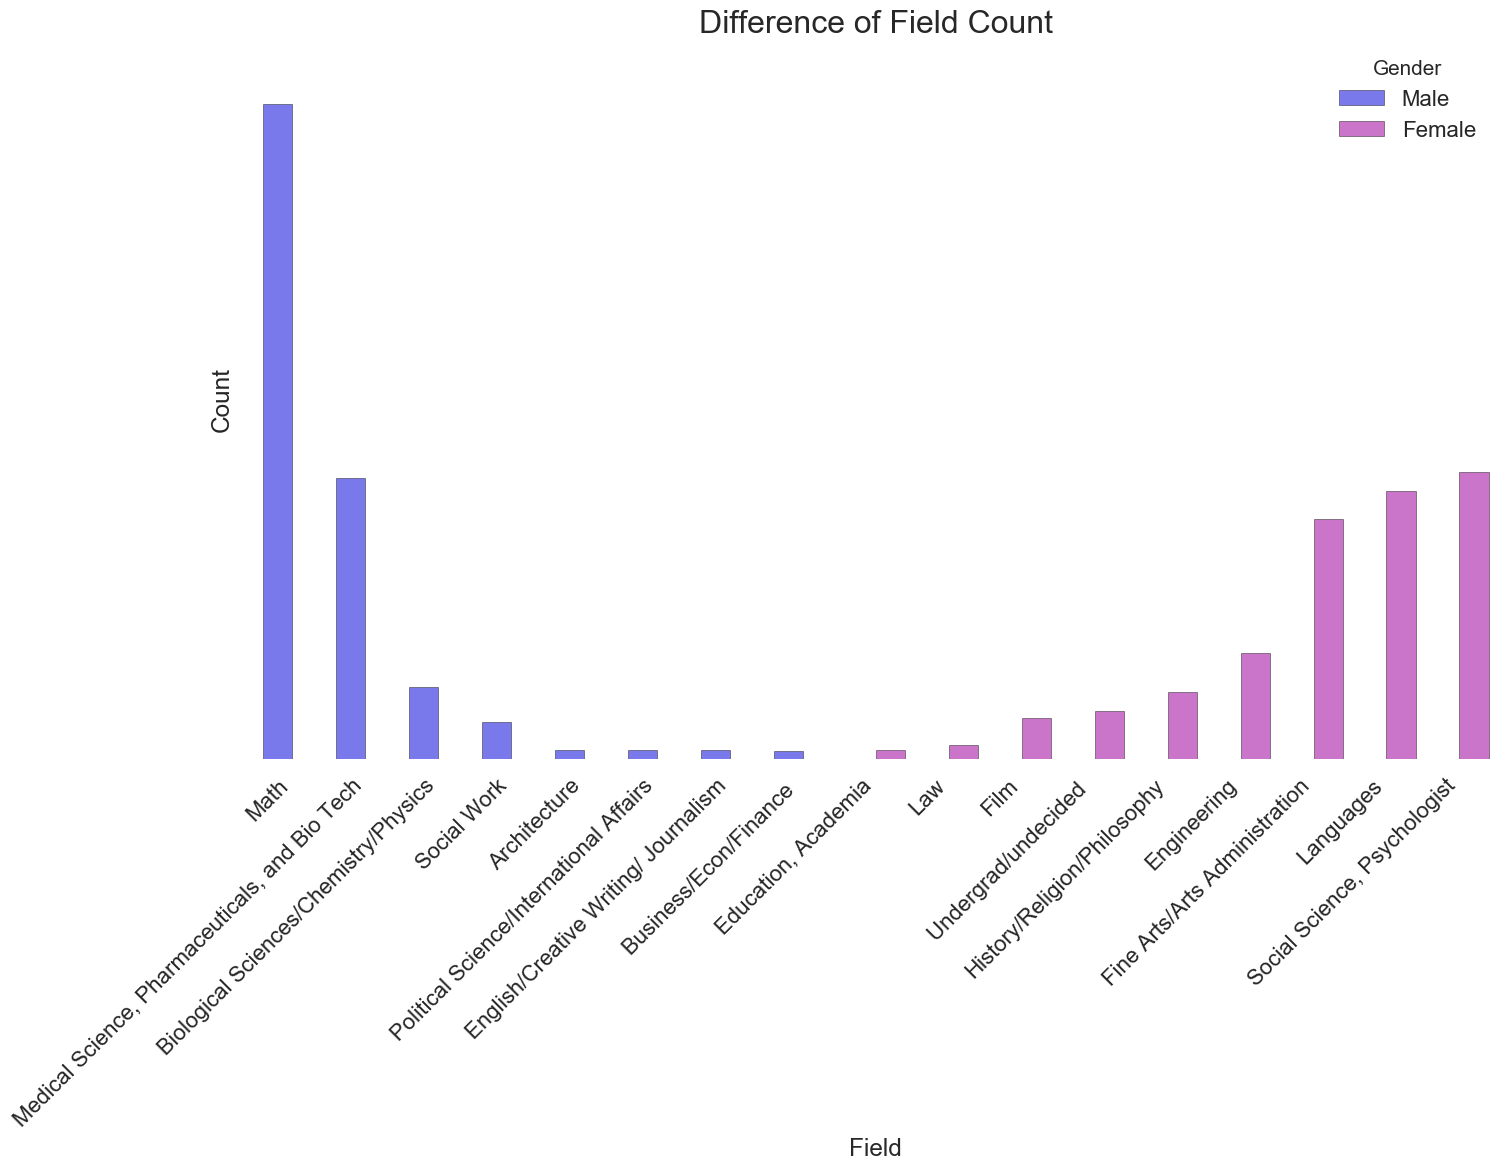

In [23]:
fig = plt.figure(figsize=(16,8))
ax0 = fig.add_subplot(111)

field_bar = sns.barplot(x='Field', y='diff', hue='Gender', data=field_counts,order=field_counts['Field'].tolist(),
                        alpha=.6,palette={"Female":'m',"Male":'b'},ax=ax0)
field_bar.set_title('Difference of Field Count',fontsize='large')
field_bar.set_autoscale_on(True)
field_bar.set_ylabel('Count')
field_bar.set_yticklabels('')
field_bar.figure.autofmt_xdate(bottom=0,rotation=45)
ax0.set_frame_on(False)
#field_bar.figure.savefig('../Assets/field_count_diff.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)
plt.show();

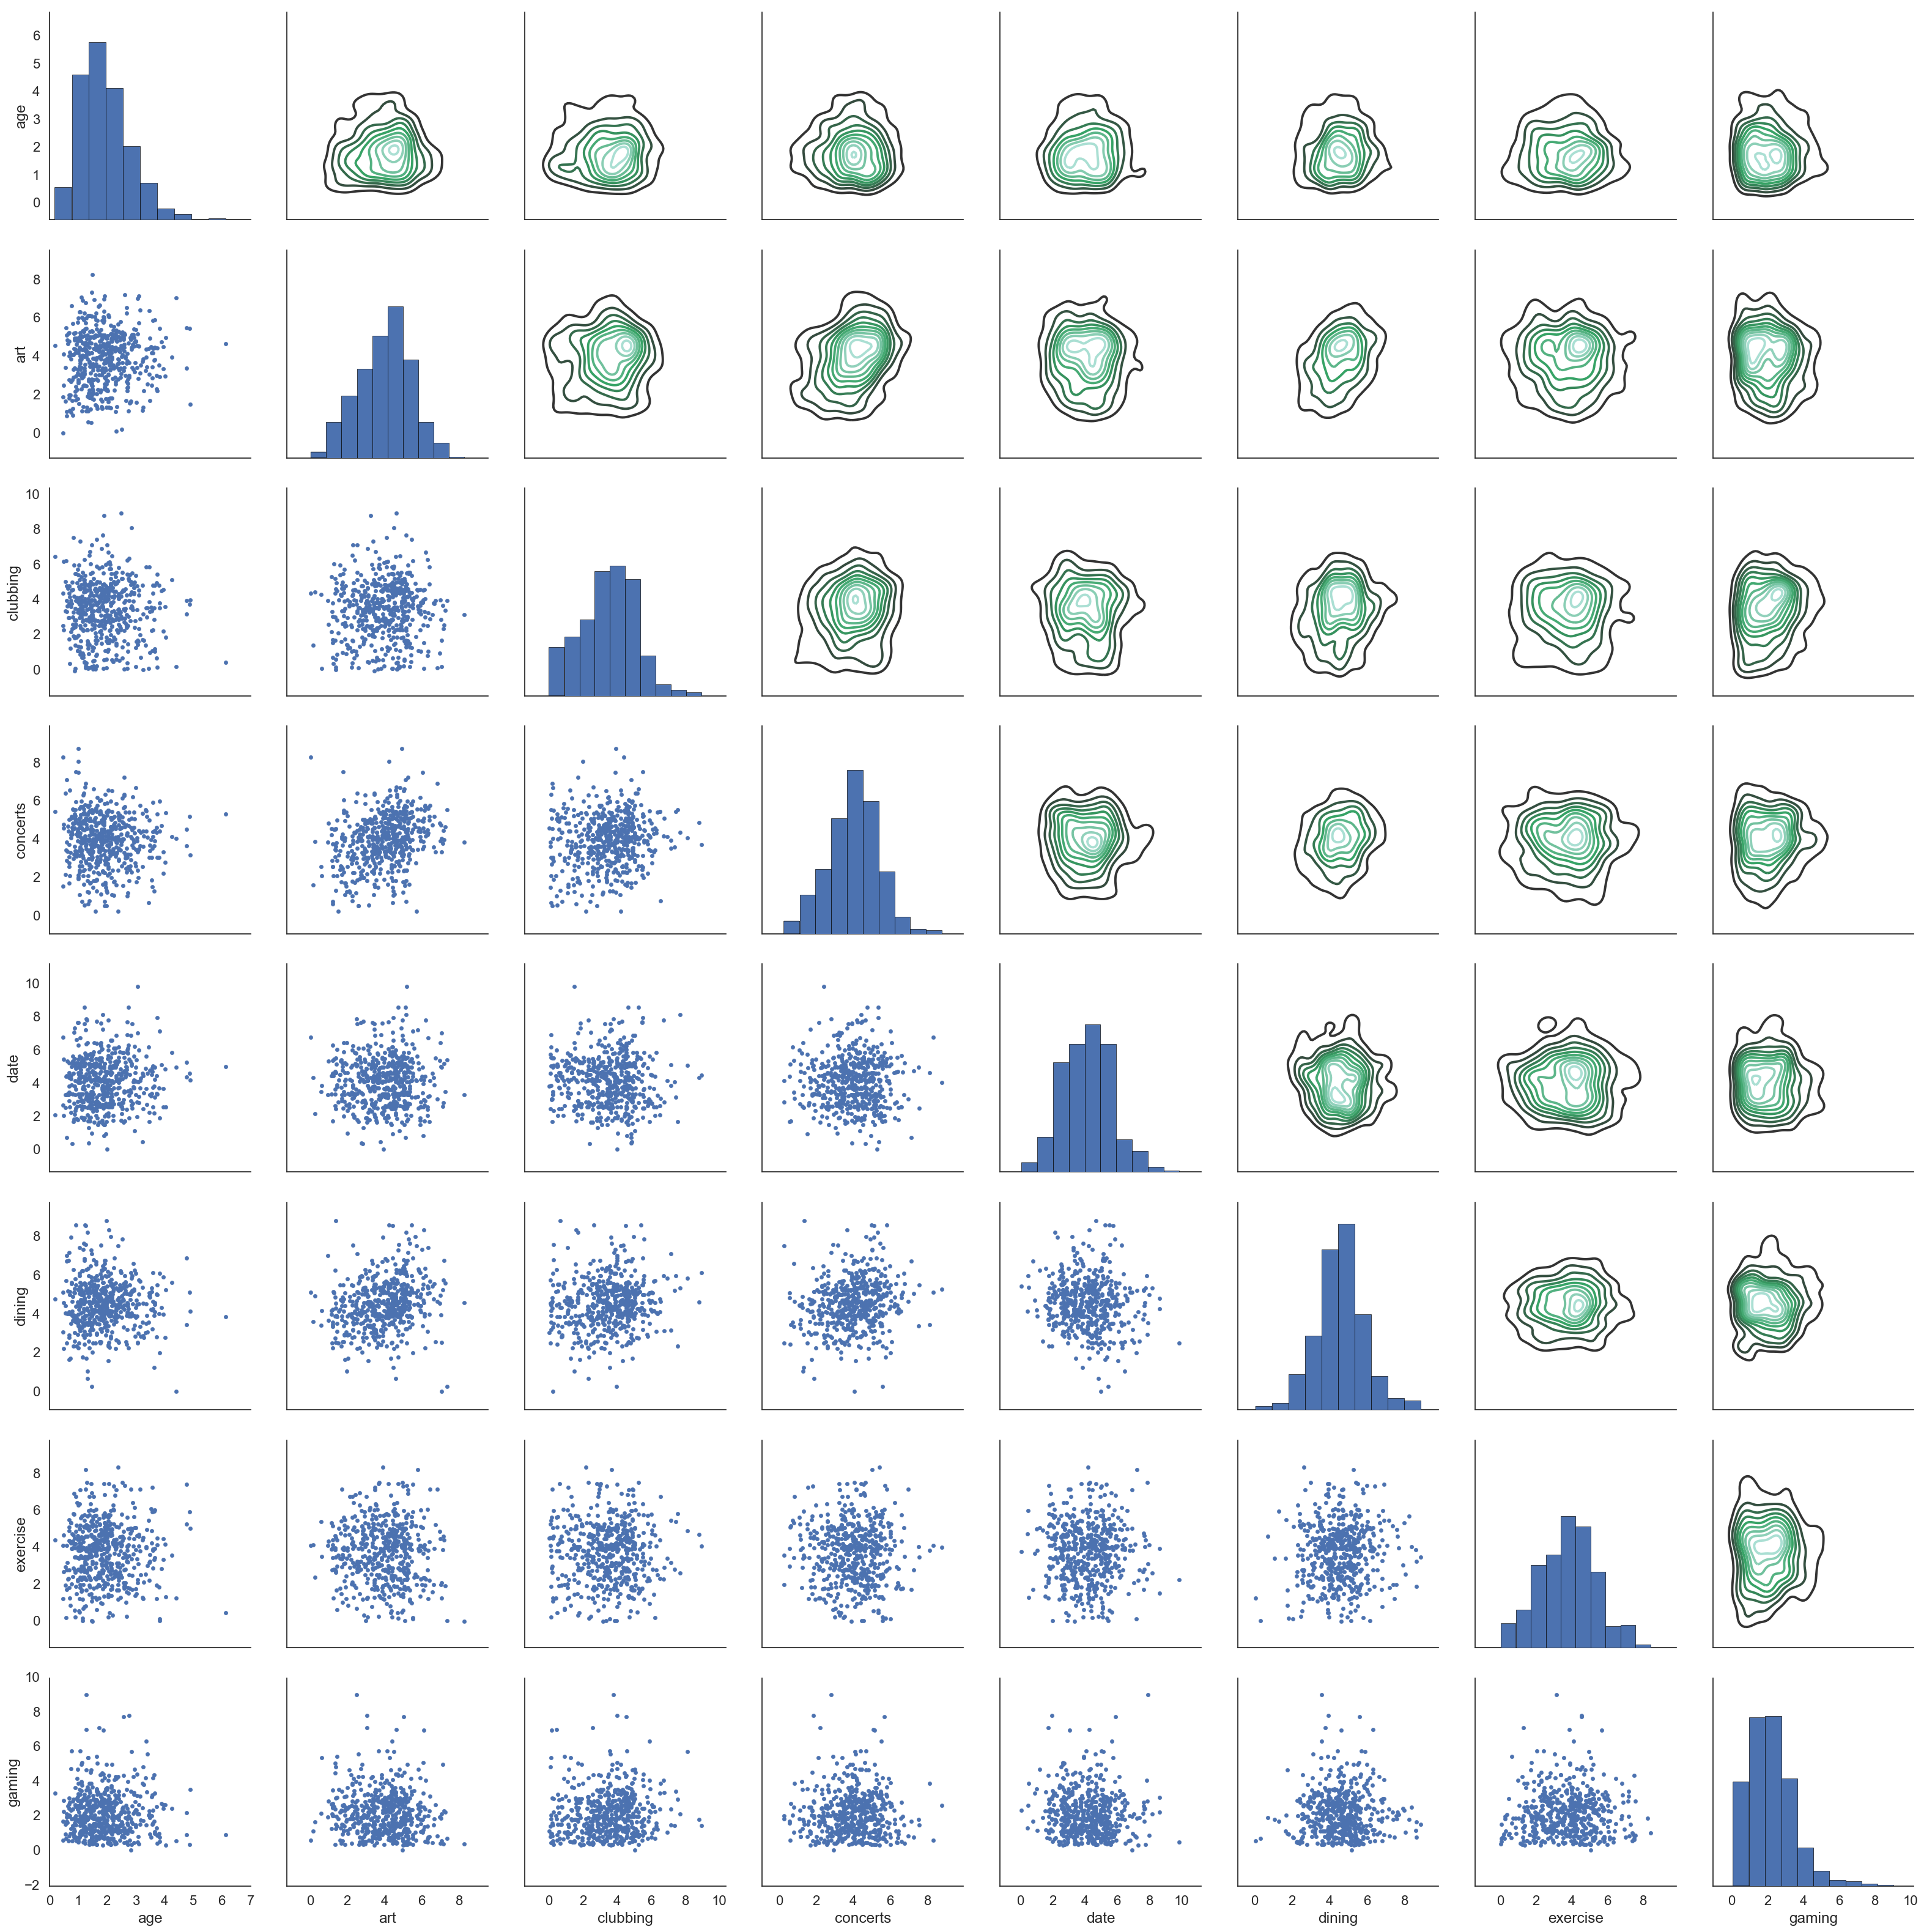

In [24]:
att_plot = iid_attributes.copy()
att_plot.dropna(inplace=True)
s=att_plot.shape[0]
num_col = att_plot.dtypes[att_plot.dtypes==(float or int)].index

att_plot.loc[:,num_col] = minmax.fit_transform(att_plot.loc[:,num_col])

att_plot.loc[:,num_col] = att_plot.loc[:,num_col].apply(lambda x: x+np.random.exponential(.8,s))

att_plot.gender

p=sns.PairGrid(att_plot[num_col[0:8]],size=4, aspect=1)
p.map_lower(plt.scatter,)
p.map_diag(plt.hist)
p.map_upper(sns.kdeplot)
plt.show()

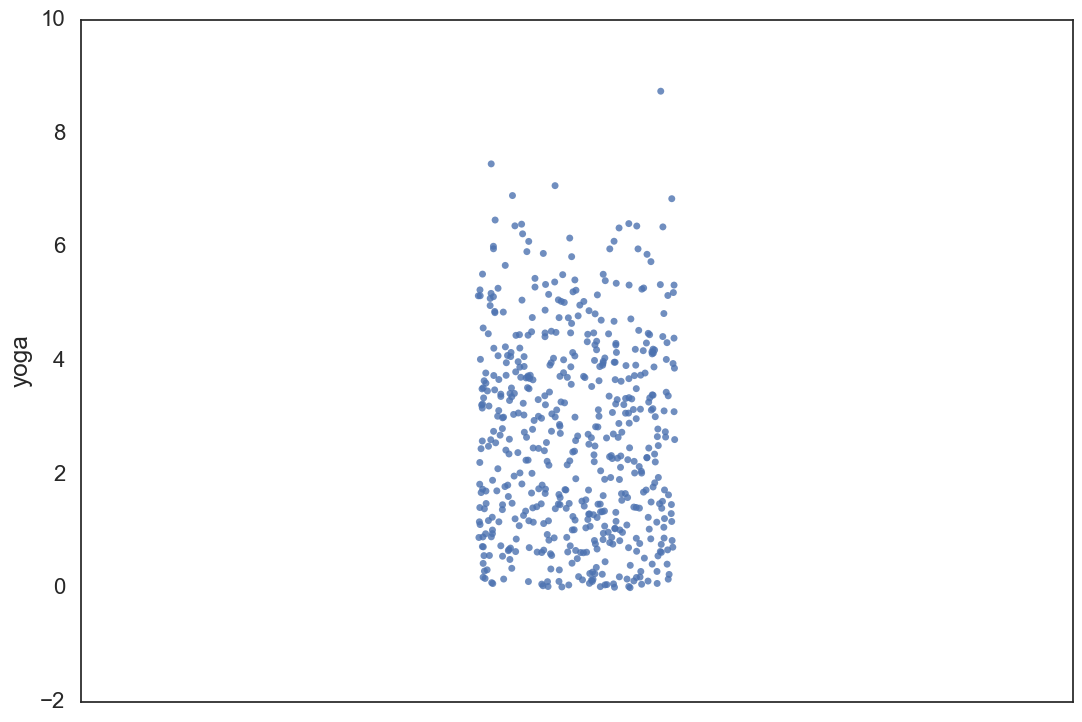

In [25]:
sns.stripplot(y='yoga',data=att_plot,jitter=True,hue='gender',alpha=.8,)

In [26]:
def sample_plotter(X, y):    
    
    colors = [(0.49803921580314636, 0.78823530673980713, 0.49803921580314636), (0.74219147983719336, 0.68359863477594707, 0.82745099032626435)]    
    size = 10
    a = .6
    v0 = 120
    v1 = 100
    
    sm = over_sampling.SMOTE(k=10, m=2, out_step=0.1)
    sm = over_sampling.RandomOverSampler()
    sm = under_sampling.EditedNearestNeighbours()
    sm = combine.SMOTEENN(k=10, m=2, out_step=0.1)
    xre, yre = sm.fit_sample(X,y)
        
    x_noise = lambda x: np.random.normal(0,.7,size=x.shape[0])
    y_noise = lambda x: np.random.normal(0,50,size=x.shape[0])
    
    dec_dict = y.value_counts().to_dict()
    resamp_dict = pd.Series(yre).value_counts().to_dict()
    
    x0 = np.linspace(v0,v0,dec_dict[0]) + x_noise(np.linspace(v0,v0,dec_dict[0]))
    y0 = np.linspace(1,100,dec_dict[0]) + y_noise(np.linspace(1,100,dec_dict[0]))
    
    no_match0 = dict(
                    x = np.linspace(v0,v0,dec_dict[0]) + x_noise(np.linspace(v0,v0,dec_dict[0])),
                    y = np.linspace(1,100,dec_dict[0]) + y_noise(np.linspace(1,100,dec_dict[0])))
    match0 = dict(
                    x = np.linspace(v1,v1,dec_dict[1]) + x_noise(np.linspace(v1,v1,dec_dict[1])),
                    y = np.linspace(1,100,dec_dict[1]) + y_noise(np.linspace(1,100,dec_dict[1])))
    
    
    no_match1 = dict(
                    x = np.linspace(v0,v0,resamp_dict[0]) + x_noise(np.linspace(v0,v0,resamp_dict[0])),
                    y = np.linspace(1,100,resamp_dict[0]) + y_noise(np.linspace(1,100,resamp_dict[0])))
    match1 = dict(
                    x = np.linspace(v1,v1,resamp_dict[1]) + x_noise(np.linspace(v1,v1,resamp_dict[1])),
                    y = np.linspace(1,100,resamp_dict[1]) + y_noise(np.linspace(1,100,resamp_dict[1])))

    ################ MAKE PLOT #################
    fig = plt.figure()
    ax0 = fig.add_subplot(211)
    ax1 = fig.add_subplot(212)
    
    ax0.scatter(x = no_match0['x'], y = no_match0['y'],c=colors[1],alpha=a,s=size)
    ax0.scatter(x = match0['x'], y = match0['y'],c=colors[0],alpha=a,s=size)

    ax1.scatter(x = no_match1['x'], y = no_match1['y'],c=colors[1],alpha=a,s=size)
    ax1.scatter(x = match1['x'], y = match1['y'],c=colors[0],alpha=a,s=size)
    
    ax0.set_xticklabels(['Yes','No'])
    ax1.set_xticklabels(['Yes','No'])
    
    ax0.set_yticklabels('')
    ax1.set_yticklabels('')
    ax0.set_xticks([v1,v0])
    ax1.set_xticks([v1,v0])
    
    plt.show()
    return fig,ax0,ax1

## Predict

In [27]:
from sklearn.covariance import EllipticEnvelope

In [28]:
fmask_attributes = filled_attributes_frame.loc[frame.gender==0].drop('gender',axis=1)
mmask_attributes =  filled_attributes_frame.loc[frame.gender==1].drop('gender',axis=1)

grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [29]:
grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

In [30]:
merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [43]:
dataset = merged_attributes
X = dataset.drop(["match",'iid_y','iid_x'],axis=1)
y = dataset["match"]
predictors = dataset.drop(["match",'iid_y','iid_x'],axis=1).columns

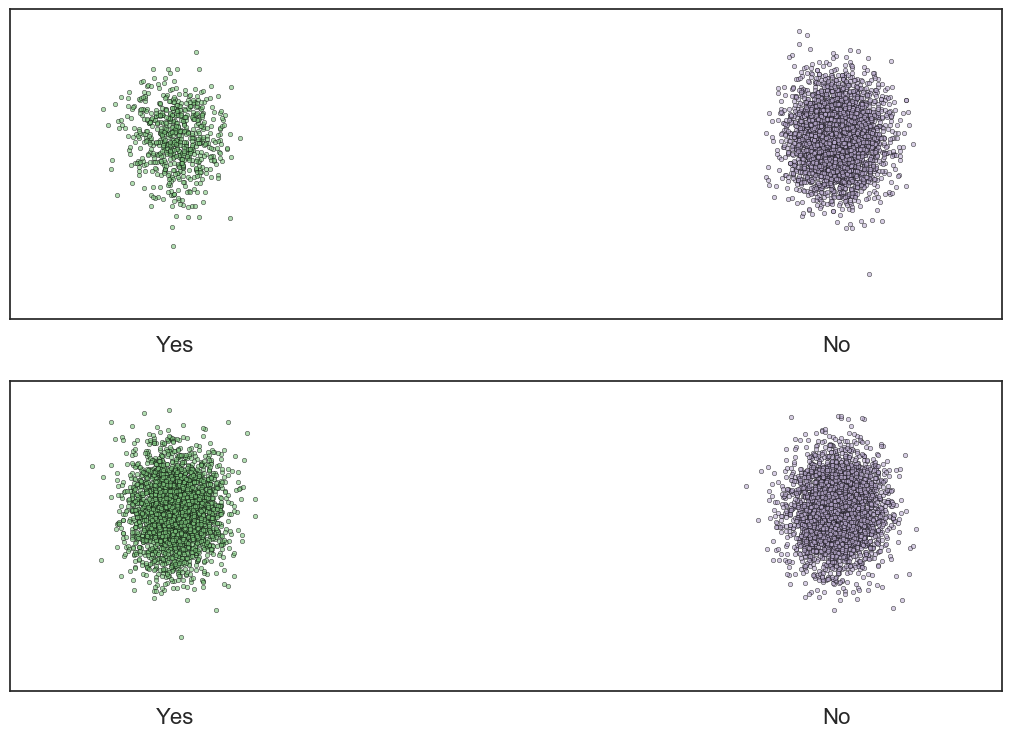

In [32]:
from imblearn import over_sampling,under_sampling,combine

sm = over_sampling.SMOTE(k=10, m=10, out_step=0.5)
xre, yre = sm.fit_sample(X,y)
fig,ax0,ax1=sample_plotter(X,y)

#fig.savefig('../Assets/resample_example.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)

In [33]:
from sklearn.cross_validation import StratifiedKFold, train_test_split,cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score 
from sklearn.linear_model import LogisticRegression 
from imblearn import over_sampling,combine
from sklearn.preprocessing import scale
from sklearn.svm import SVC
def modelfit(model, data, xcolumns, ycolumn='match', title='Model', 
             test_size=.25, n_folds=3, scale_data=True,resamp=True):
    
    if scale_data:
        data[xcolumns] = scale(data[xcolumns])
    
    train_data, test_data = train_test_split(data, test_size=test_size,stratify=data.match)
    xtrain, ytrain, xtest, ytest = train_data[xcolumns], train_data['match'], test_data[xcolumns], test_data['match']
    
    
    sns.set_palette(palette='muted')
    
    if resamp:
        resamp = combine.SMOTETomek()
        #resamp = over_sampling.RandomOverSampler()
        xtrain, ytrain = resamp.fit_sample(xtrain, ytrain)
        
    kfold = StratifiedKFold(ytrain, n_folds=n_folds)
    model.fit(xtrain, ytrain)
    
    predictions = model.predict(xtest)
    probability = model.predict_proba(xtest)[:,1]
    cv_score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='recall')
        
    print(classification_report(test_data[ycolumn].values, predictions))
    print ("Classification\n")
    print ("Accuracy : {0:.4f}".format(accuracy_score(ytest, predictions)))
    print ("AUC Score (Train): {0:.4f}".format(roc_auc_score(ytest, probability)))
    print ("CV Score : Mean {0:.4f} | Std {0:.4f} | Min {0:.4f} | Max {0:.4f}".format(
            np.mean(cv_score),
            np.std(cv_score),
            np.min(cv_score),
            np.max(cv_score)))
    #plt.rc({'font.size': 10.0})
    
    #if hasattr(model,'feature_importances_'):  
    #    plt.figure(figsize=(13,5))
    #    feat_imp = pd.Series(model.feature_importances_, xcolumns).sort_values(ascending=False)
    #    feat_imp.plot(kind='bar',title='Feature Importances',fontsize=10)
    #    plt.title('Feature Importances: {}'.format(title),fontdict={'size': 10})
    #    plt.ylabel('Feature Importance',fontsize=10)
    #    
    #    
    #else:
    #    try:
    #        plt.figure(figsize=(13,5))
    #        coefs_imp = pd.Series(model.coef_[0], xcolumns).sort_values(ascending=False)
    #        coefs_imp.plot(kind='bar',title='Coef Values: {}'.format(title),fontsize=10)
    #        plt.title('Coef Values',fontdict={'size': 10})
    #        plt.ylabel('Coef Values',fontsize=10)
    #    except:
    #        print('NO COEFS')
    #    
    
    #plt.show()
    print()
    print()
    return model, train_data, test_data

In [56]:
from sklearn.metrics import roc_curve, auc
def roc_curve_plot(y_true, y_score,title):

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f}, {1})'.format(roc_auc, name))
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

### No Resamp

In [60]:
gbc0 = GradientBoostingClassifier(learning_rate=0.001,  min_samples_split=16, min_samples_leaf=5, max_depth=5, 
                                 max_features='sqrt', subsample=0.8, n_estimators=4200)

lgr0 = LogisticRegression(C=1,penalty='l2')

svc0 = SVC(probability=True)

In [74]:
#xtrain, xtest, ytrain, ytest = train_test_split(scale(X), y,  test_size=.25,) #stratify=None,)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,  test_size=.25,) #stratify=None,)

gbc0.fit(xtrain, ytrain)
lgr0.fit(xtrain, ytrain)
svc0.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       829
          1       0.75      0.04      0.07       157

avg / total       0.83      0.84      0.78       986

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       829
          1       0.67      0.05      0.09       157

avg / total       0.82      0.84      0.78       986

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       829
          1       0.00      0.00      0.00       157

avg / total       0.71      0.84      0.77       986



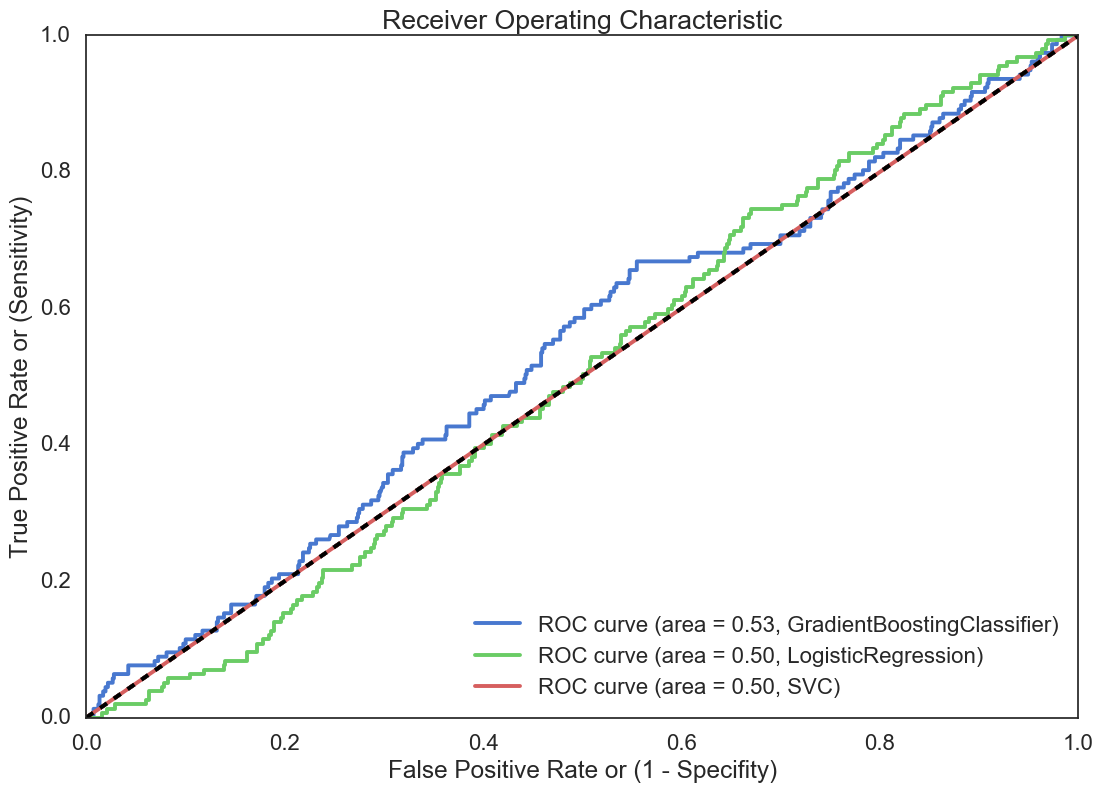

In [75]:
models = zip(['GradientBoostingClassifier','LogisticRegression','SVC'],[gbc0,lgr0,svc0])
fig = plt.figure()

for name, model in models:
    pred = model.predict(xtest)
    pred_proba = model.predict_proba(test_data[predictors])[:,1]
    
    print(classification_report(ytest,pred))
    roc_curve_plot(ytest, pred_proba, title=name)

plt.show();
#fig.savefig('../Assets/bad_roc_plot.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)

## Resamp

In [76]:
gbc1 = GradientBoostingClassifier(learning_rate=0.001,  min_samples_split=16, min_samples_leaf=5, max_depth=5, 
                                 max_features='sqrt', subsample=0.8, n_estimators=4200)
lgr1 = LogisticRegression()
svc1 = SVC(probability=True)

In [78]:
from imblearn.over_sampling import SMOTE

xtrain, xtest, ytrain, ytest = train_test_split(scale(X), y, stratify=None, test_size=.25)
resamp = SMOTE(k=10, m=15)

x_resamp, y_resamp = resamp.fit_sample(xtrain, ytrain)

gbc1.fit(x_resamp, y_resamp)
lgr1.fit(x_resamp, y_resamp)
svc1.fit(x_resamp, y_resamp)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       825
          1       0.43      0.22      0.29       161

avg / total       0.79      0.83      0.80       986

             precision    recall  f1-score   support

          0       0.88      0.66      0.75       825
          1       0.23      0.52      0.32       161

avg / total       0.77      0.64      0.68       986

             precision    recall  f1-score   support

          0       0.86      0.91      0.88       825
          1       0.33      0.23      0.27       161

avg / total       0.77      0.80      0.78       986



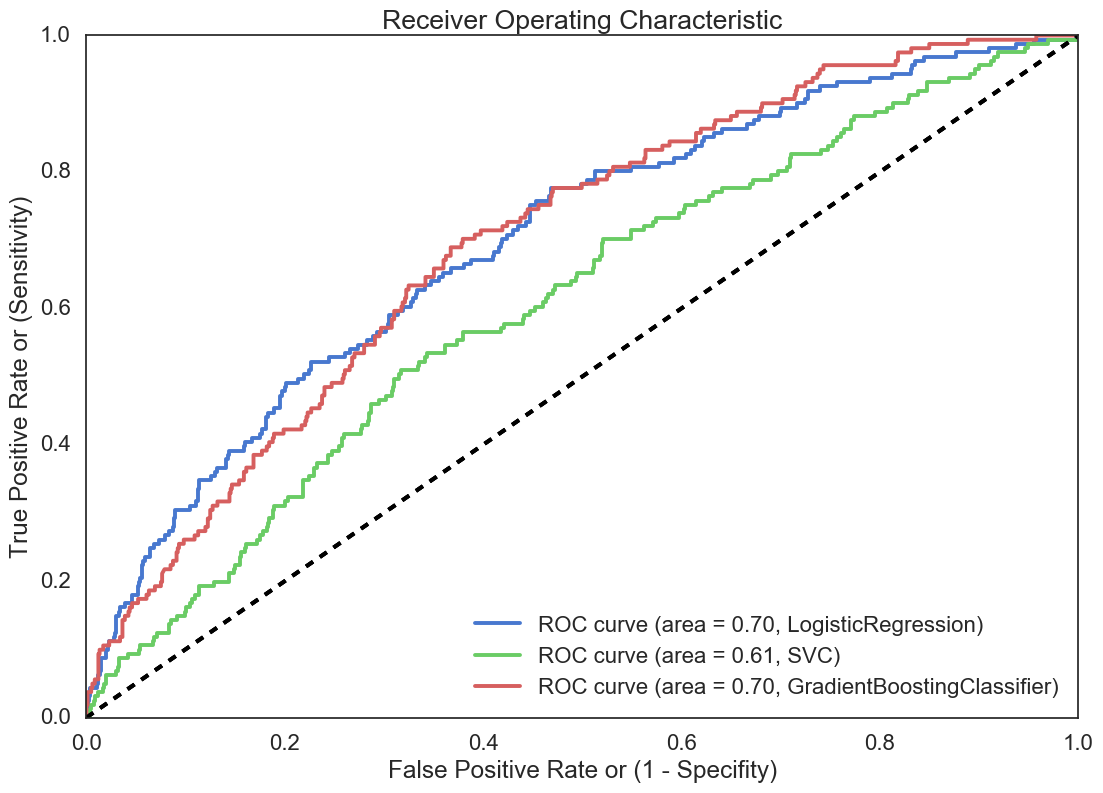

In [84]:
models = zip(['LogisticRegression','SVC','GradientBoostingClassifier'],[gbc1,lgr1,svc1])
fig = plt.figure()
for name, model in models:
    
    pred = model.predict(xtest)
    pred_proba = model.predict_proba(xtest)[:,1]

    print(classification_report(ytest,pred))
    roc_curve_plot(ytest, pred_proba, title=name)

plt.show();
#fig.savefig('../Assets/better_roc_plot.svg', format='svg', dpi=1200,bbox_inches='tight',
                         #transparent=True)

## Once again

In [53]:
gbc = GradientBoostingClassifier(learning_rate=0.001, min_samples_split=16, n_estimators=4200,
                                                               min_samples_leaf=6,
                                                               max_depth=6,
                                                               max_features='sqrt',
                                                               subsample=0.8)

svc = SVC(C=1,gamma='auto', probability=True)
lgr = LogisticRegression(C=1,penalty='l2')

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X.values), y.values,stratify=y.values)
xresamp, yresamp = over_sampling.SMOTE().fit_sample(xtrain, ytrain)

In [85]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X.values), y.values,stratify=y.values)
xresamp, yresamp = over_sampling.SMOTE().fit_sample(xtrain, ytrain)

svc = SVC(C=10,gamma='auto', probability=True)
kfold = StratifiedKFold(yresamp, n_folds=3)


print(cross_val_score(svc, xresamp, yresamp, scoring='recall', cv=kfold))

[ 0.90799031  1.          1.        ]


In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X.values), y.values,stratify=y.values)
xresamp, yresamp = over_sampling.RandomOverSampler().fit_sample(xtrain, ytrain)

gbc.fit(xresamp, yresamp)
print(classification_report(y_true=ytest,y_pred=gbc.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86       826
          1       0.32      0.40      0.36       160

avg / total       0.79      0.77      0.78       986



In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X.values), y.values,stratify=y.values)
xresamp, yresamp = over_sampling.RandomOverSampler().fit_sample(xtrain, ytrain)

lgr.fit(xresamp, yresamp)
print(classification_report(y_true=ytest,y_pred=lgr.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.65      0.75       826
          1       0.24      0.56      0.33       160

avg / total       0.78      0.63      0.68       986

